In [2]:
pip install yfinance numpy pandas scikit-learn keras matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from datetime import datetime


In [4]:
end = datetime.now()
start = datetime(end.year-10, end.month, end.day)

df = yf.download("RELIANCE.NS", start=start, end=end)

[*********************100%***********************]  1 of 1 completed


In [5]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS
Date,,,,,
2016-02-11,200.335114,209.305832,198.374122,208.634102,17114833
2016-02-12,196.434814,202.361125,192.436994,202.361125,29319458
2016-02-15,205.145493,206.142239,198.915834,198.915834,19283523
2016-02-16,201.635223,207.583186,200.865988,206.088067,13024856
2016-02-17,206.413116,207.464032,198.569150,202.621140,15442221


In [6]:
data = df[['Close']]
data.head()

Price,Close
Ticker,RELIANCE.NS
Date,
2016-02-11,200.335114
2016-02-12,196.434814
2016-02-15,205.145493
2016-02-16,201.635223
2016-02-17,206.413116


In [7]:
data.head(-5)

Price,Close
Ticker,RELIANCE.NS
Date,
2016-02-11,200.335114
2016-02-12,196.434814
2016-02-15,205.145493
2016-02-16,201.635223
2016-02-17,206.413116
...,...
2026-01-29,1391.000000
2026-01-30,1395.400024


In [8]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data)
scaled_data

array([[0.00279418],
       [0.        ],
       [0.00624034],
       ...,
       [0.90636627],
       [0.90414544],
       [0.9114527 ]], shape=(2471, 1))

In [9]:
X, y = [], []

for i in range(200, len(scaled_data)):
    X.append(scaled_data[i-200:i])
    y.append(scaled_data[i])

X = np.array(X)
y = np.array(y)

X.shape, y.shape

((2271, 200, 1), (2271, 1))

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [11]:
model = Sequential()

model.add(LSTM(50, return_sequences=True, input_shape=(200,1)))
model.add(Dropout(0.2))

model.add(LSTM(50))
model.add(Dropout(0.2))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
model.summary()


c:\Users\MOHIT\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 200, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 200, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.fit(X_train, y_train, epochs=20, batch_size=32)

Epoch 1/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - loss: 0.0323 - mae: 0.1174
Epoch 2/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 0.0047 - mae: 0.0489
Epoch 3/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.0039 - mae: 0.0444
Epoch 4/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.0035 - mae: 0.0428
Epoch 5/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 0.0032 - mae: 0.0413
Epoch 6/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 0.0032 - mae: 0.0413
Epoch 7/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - loss: 0.0033 - mae: 0.0414
Epoch 8/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 0.0032 - mae: 0.0404
Epoch 9/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 0.0029 - mae: 0.0384
Epoch 10/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 0.0030 - mae: 0.0393
Epoch 11/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 0.0027 - mae: 0.0373
Epoch 12/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 0.0031 - mae: 0.0402
Epoch 13/20
57/57 ━━━━━━━━━━━━━━━━━━━

In [13]:
loss, mae = model.evaluate(X_test,y_test)
print('Test loss: ',loss)
print('Test MAE: ',mae)

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 5.0999e-04 - mae: 0.0169
Test loss:  0.0005099906120449305
Test MAE:  0.0169390756636858


In [14]:
predicted_price = model.predict(X_test)
predicted_price = scaler.inverse_transform(predicted_price)

real_price = scaler.inverse_transform(y_test)

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step


In [15]:
mse = mean_squared_error(real_price,predicted_price)
rmse = np.sqrt(mse)
r2 = r2_score(real_price,predicted_price)

print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)

MSE: 993.686249422938
RMSE: 31.522789366154417
R2 Score: 0.9934987455852434


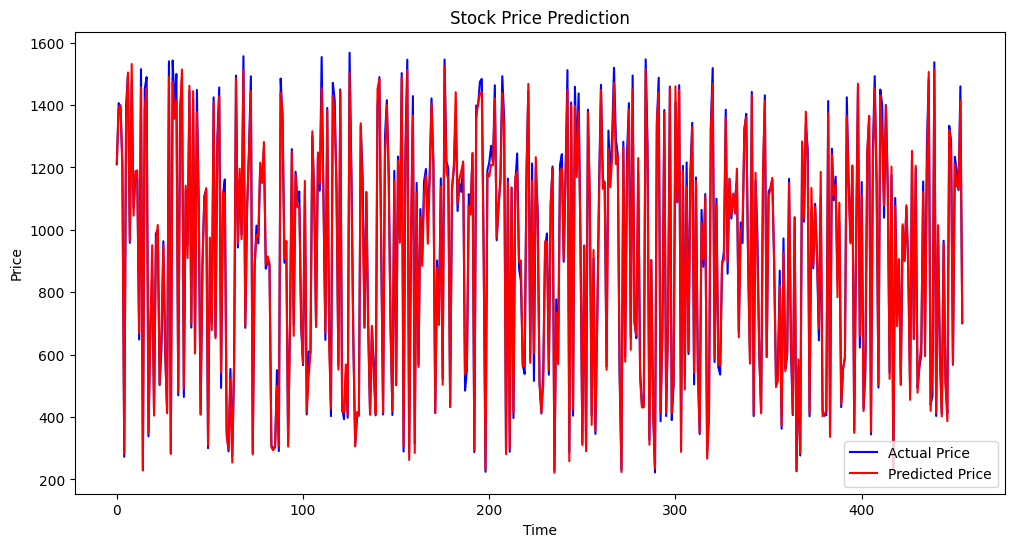

In [16]:
plt.figure(figsize=(12,6))
plt.plot(real_price, color='blue', label='Actual Price')
plt.plot(predicted_price, color='red', label='Predicted Price')
plt.title("Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()

In [17]:
last_200_days = scaled_data[-200:]

last_200_days = np.reshape(last_200_days, (1, 200, 1))

next_day_prediction = model.predict(last_200_days)

next_day_prediction = scaler.inverse_transform(next_day_prediction)

print("📈Predicted Next Day Price:", next_day_prediction[0][0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
📈Predicted Next Day Price: 1410.1349


In [18]:
import pickle
pickle.dump(model, open("model.pkl","wb"))

In [19]:
model.save("model.h5")

In [20]:
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)